In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [42]:
# imgQ41 meanshift
img41 = cv2.imread('Lab3_images/Lab3_images/imgQ41.jpg')
img413 = cv2.cvtColor(img41,cv2.COLOR_BGR2RGB)
img411 = np.reshape(img413,[-1,3])
bandwidth = estimate_bandwidth(img411, quantile=0.2, n_samples=500)
ms41 = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms41.fit(img411)
labels41 = ms41.labels_
labels41 = labels41.reshape((img41.shape[0],img41.shape[1]))

In [2]:
# imgQ42 meanshift
img42 = cv2.imread('Lab3_images/Lab3_images/imgQ42.jpg')
img423 = cv2.cvtColor(img42,cv2.COLOR_BGR2RGB)
img421 = np.reshape(img423,[-1,3])
bandwidth = estimate_bandwidth(img421, quantile=0.2, n_samples=500)
ms42 = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms42.fit(img421)
labels42 = ms42.labels_
labels42 = labels42.reshape((img42.shape[0],img42.shape[1]))

In [61]:
# imgQ41 watershed 
img41_water = cv2.cvtColor(img41, cv2.COLOR_BGR2GRAY)
thresh1 = cv2.threshold(img41_water, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#thresh1 = cv2.GaussianBlur(thresh1, (3,3),0)

distance1 = ndi.distance_transform_edt(thresh1)
local_max1 = peak_local_max(distance1, min_distance=5, indices=False,labels = thresh1)
markers1 = ndi.label(local_max1,structure=np.ones((3, 3)))[0]
ws_labels1 = watershed(-distance1, markers1, mask=thresh1)

In [63]:
# imgQ42 watershed
img42_water = cv2.cvtColor(img42, cv2.COLOR_BGR2GRAY)
thresh2 = cv2.threshold(img42_water, 0, 255, cv2.THRESH_BINARY |cv2.THRESH_OTSU)[1]
#thresh2 = cv2.GaussianBlur(thresh2, (3,3),3)

distance2 = ndi.distance_transform_edt(thresh2)
local_max2 = peak_local_max(distance2, min_distance=5, indices=False, footprint=np.ones((3, 3)), labels = thresh2)
markers2 = ndi.label(local_max2)[0]
ws_labels2 = watershed(-distance2, markers2, mask=thresh2)

In [86]:
def plot_three_images(title,image1, label1, image2, label2, image3, label3):
    fig = plt.figure()
    # Display the original image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)
    
    # Display the watershed image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)
    
    # Display the meanshift image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)
    plt.savefig('all_' + title)
    plt.show()

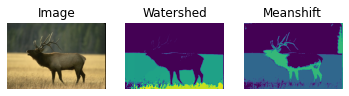

In [87]:
plot_three_images('imgQ41', img413, 'Image', ws_labels1, 'Watershed', labels41, 'Meanshift',)

In [88]:
plot_three_images('imgQ42', img423, 'Image', ws_labels2, 'Watershed', labels42, 'Meanshift',)